In [401]:
# Aula 15 IABD Kmeans - revisão
import pandas as pd # biblioteca que permite criar a base de dados
import matplotlib.pyplot as plt # plota gráficos
from sklearn.cluster import KMeans # biblioteca aprendizado nao supervisionado Kmeans
import seaborn as sns # importa biblioteca seaborn
import matplotlib.pyplot as plt # biblioteca matplotlib
from mpl_toolkits.mplot3d import Axes3D #biblioteca graficos 3d

In [402]:
# cria base de dados
dados = pd.read_csv("dadosacoes.csv")

In [403]:
dados.head() # exibe as primeiras linhas do dataframe

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [404]:
dados.tail() #exibe as ultimas linhas do dataframe

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866
99,VALE3,111,19,230


Text(0.5, 1.0, 'Box plot Ação x Preço')

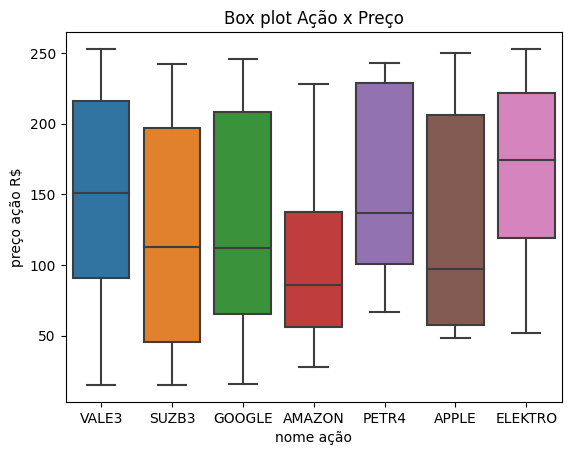

In [405]:
sns.boxplot(x=dados['nome ação'],y=dados['preço ação R$']) #plota boxplot com seaborn
# x - eixo x y - eixo y
plt.title("Box plot Ação x Preço")

In [406]:
# transformação dos dados
dados_ativos = pd.get_dummies(dados,columns=['nome ação']) # aplica o get dummies 
#para transformar variaveis categóricas em numericas

In [407]:
dados_ativos

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_AMAZON,nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,False,True,False
4,212,9,2975,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,False,True
97,99,35,980,False,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,False,True


In [408]:
# aplicando algoritmo de aprendizdo não supervisionado
kmeans = KMeans(n_clusters=4) # aplicando kmeans com 4 clusters
kmeans.fit(dados_ativos) #aplica o algoritmo kmeans no conjunto de dados

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [409]:
# avaliar a métrica do kmeans
sse = kmeans.inertia_
print(sse)

12976267.45755915


In [410]:
# Visualizar os resultados do agrupamento
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

Text(0, 0.5, 'preço ação R$')

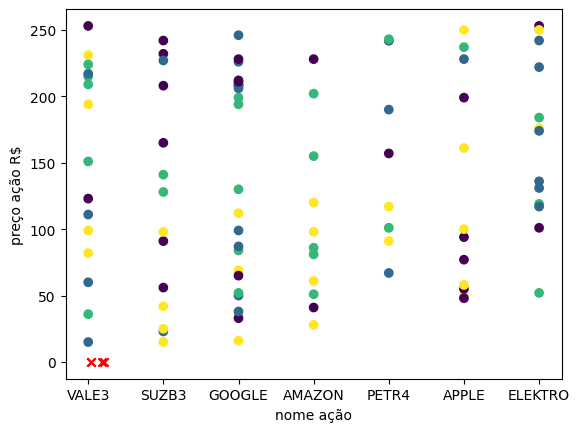

In [411]:
# Plotando o gráfico das visualizações

plt.scatter(dados['nome ação'],dados['preço ação R$'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("nome ação")
plt.ylabel("preço ação R$")

In [412]:
# Passo 7: Analisar os grupos resultantes
dados_ativos['Grupo'] = labels # armazena os labels dos grupos restantes
grouped_data = dados_ativos.groupby('Grupo').mean() # agrupa os grupos com a media
print(grouped_data)

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Grupo                                                              
0         150.583333   52.000000                     3114.291667   
1         153.038462   50.307692                      553.961538   
2         142.347826   50.695652                     4238.695652   
3         101.740741   54.777778                     2101.259259   

       nome ação_AMAZON  nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Grupo                                                                           
0              0.083333         0.208333           0.083333          0.208333   
1              0.000000         0.038462           0.230769          0.384615   
2              0.217391         0.043478           0.130435          0.217391   
3              0.148148         0.185185           0.074074          0.185185   

       nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Grupo                                        

In [413]:
print(centroids) # printa o valor da distancia entre os pontos

[[1.50583333e+02 5.20000000e+01 3.11429167e+03 8.33333333e-02
  2.08333333e-01 8.33333333e-02 2.08333333e-01 8.33333333e-02
  2.50000000e-01 8.33333333e-02]
 [1.53038462e+02 5.03076923e+01 5.53961538e+02 0.00000000e+00
  3.84615385e-02 2.30769231e-01 3.84615385e-01 1.15384615e-01
  7.69230769e-02 1.53846154e-01]
 [1.42347826e+02 5.06956522e+01 4.23869565e+03 2.17391304e-01
  4.34782609e-02 1.30434783e-01 2.17391304e-01 8.69565217e-02
  8.69565217e-02 2.17391304e-01]
 [1.01740741e+02 5.47777778e+01 2.10125926e+03 1.48148148e-01
  1.85185185e-01 7.40740741e-02 1.85185185e-01 1.11111111e-01
  1.48148148e-01 1.48148148e-01]]


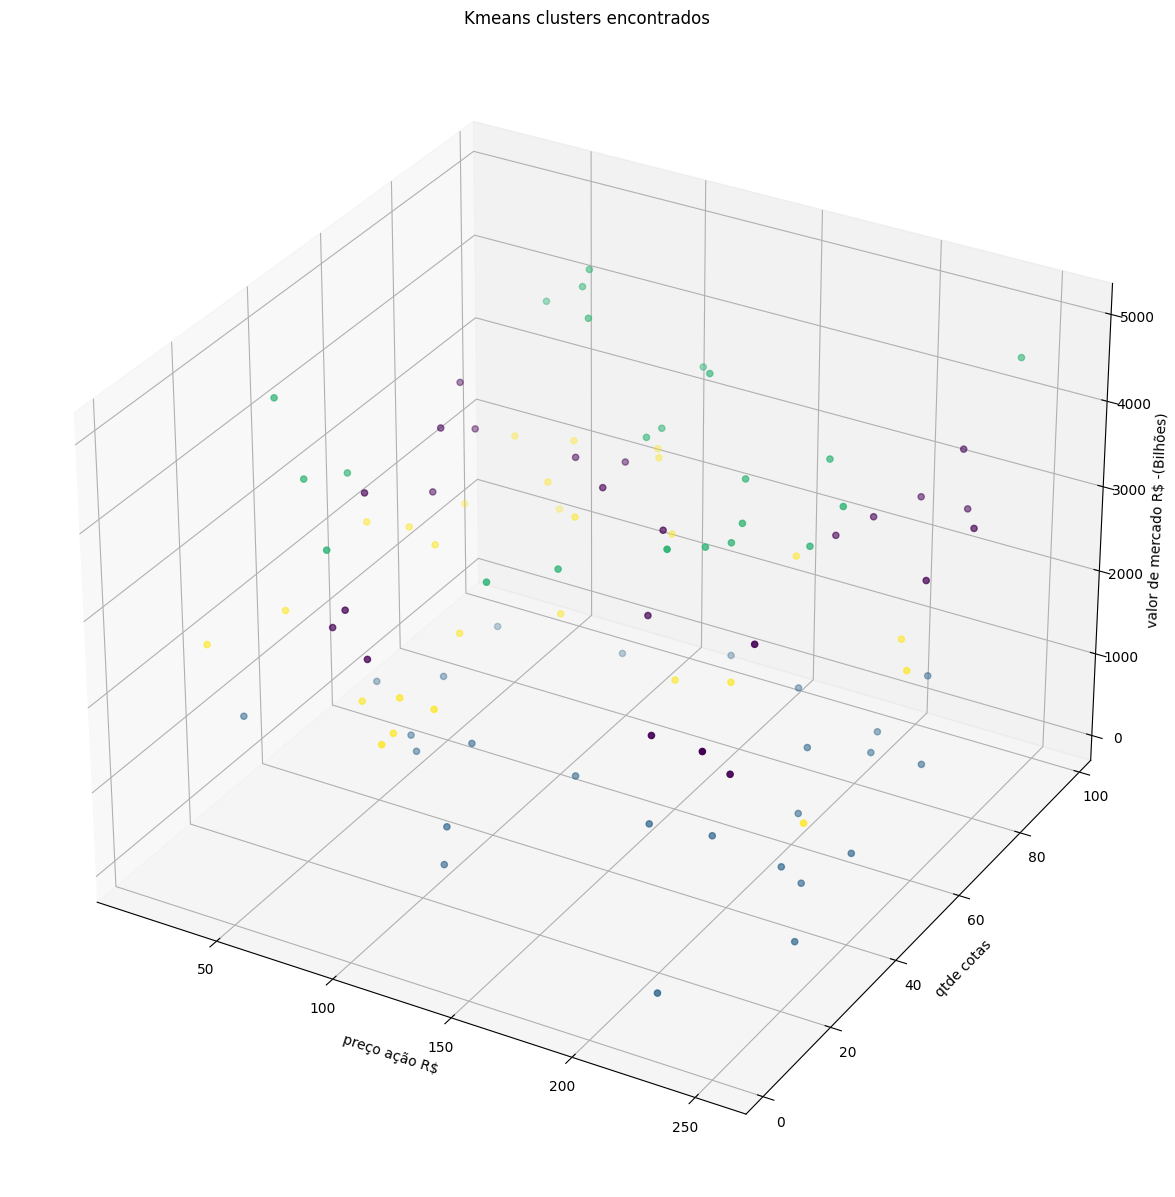

In [414]:
# Criando o gráfico em 3D
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure(figsize=(15,15)) # ajusta o tamanho da figura
ax = fig.add_subplot(111, projection='3d') # cria variável para armazenar a figura
ax.scatter(dados['preço ação R$'], dados['qtde cotas'], dados['valor de mercado R$ -(Bilhões)'], c=labels)


ax.set_title('Kmeans clusters encontrados' )
ax.set_xlabel('preço ação R$')
ax.set_ylabel('qtde cotas')
ax.set_zlabel('valor de mercado R$ -(Bilhões)')

plt.show()

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


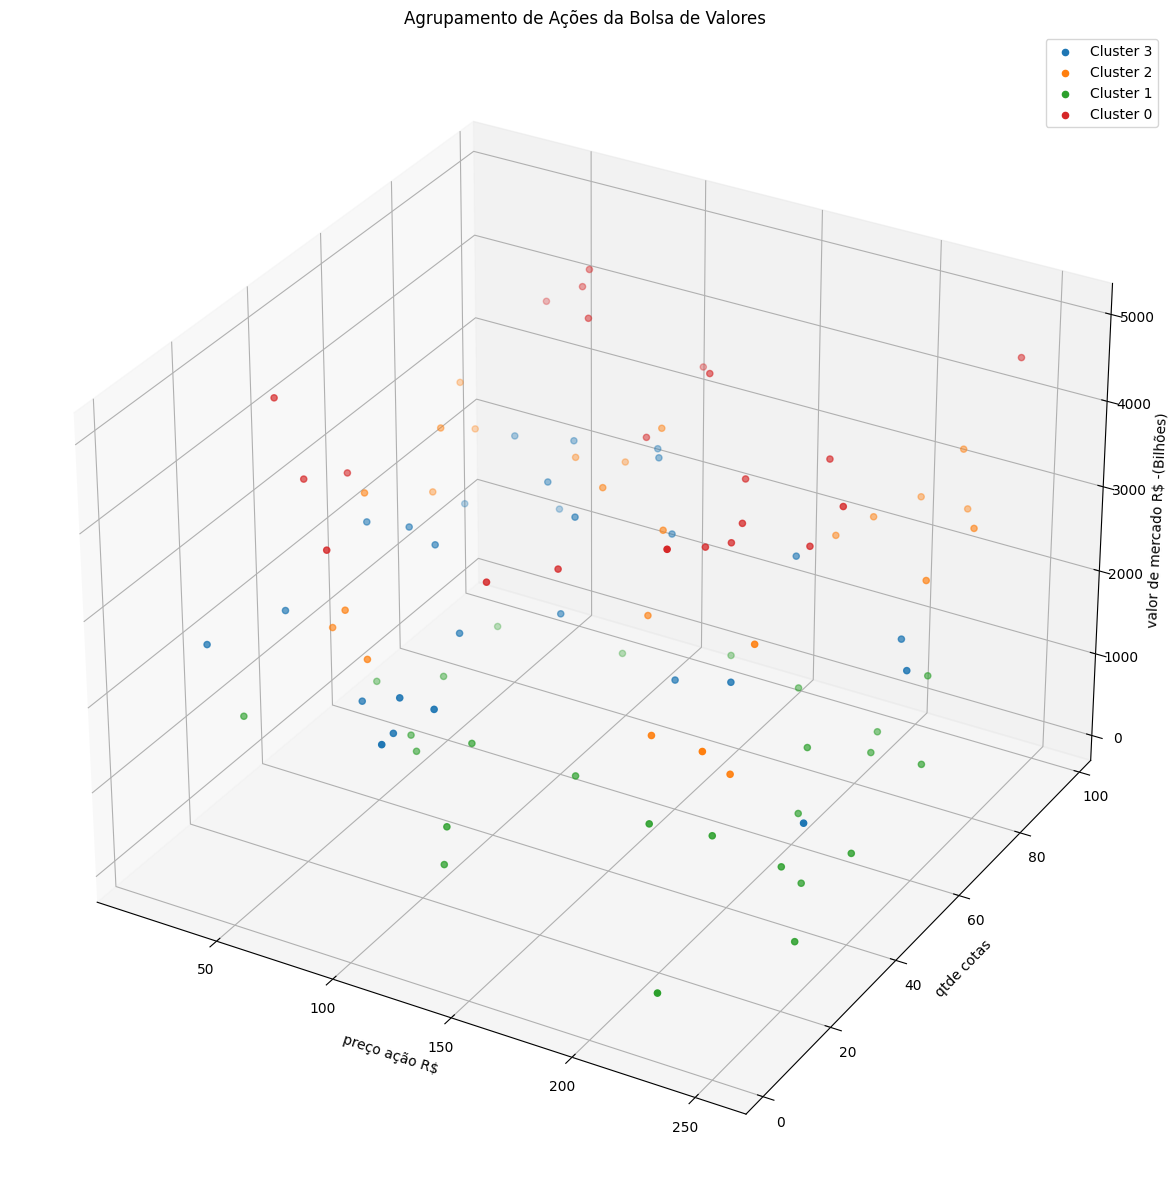

         Preço da Ação  Volume de Negociação  Capitalização de Mercado  \
Cluster                                                                  
0          2292.157282          2.600392e+06              8.548502e+11   
1          1721.803918          2.772412e+06              1.812930e+12   
2          1669.222561          2.546484e+06              3.508185e+11   
3          2110.593040          2.425316e+06              1.312753e+12   

         Símbolo_AMZN  Símbolo_FB  Símbolo_GOOGL  Símbolo_MSFT  Símbolo_TSLA  
Cluster                                                                       
0            0.238095    0.142857       0.190476      0.047619      0.190476  
1            0.227273    0.136364       0.181818      0.090909      0.181818  
2            0.212121    0.181818       0.181818      0.181818      0.151515  
3            0.250000    0.083333       0.208333      0.000000      0.250000  


In [415]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

dados = pd.read_csv("dadosacoes.csv")

# Realizar o agrupamento com K-Means
dados = pd.get_dummies(dados, columns=['nome ação'], drop_first=True)
features = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

dados['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for cluster in dados['Cluster'].unique():
    cluster_dados = dados[dados['Cluster'] == cluster]
    ax.scatter(cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], cluster_dados['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('preço ação R$')
ax.set_ylabel('qtde cotas')
ax.set_zlabel('valor de mercado R$ -(Bilhões)')
ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


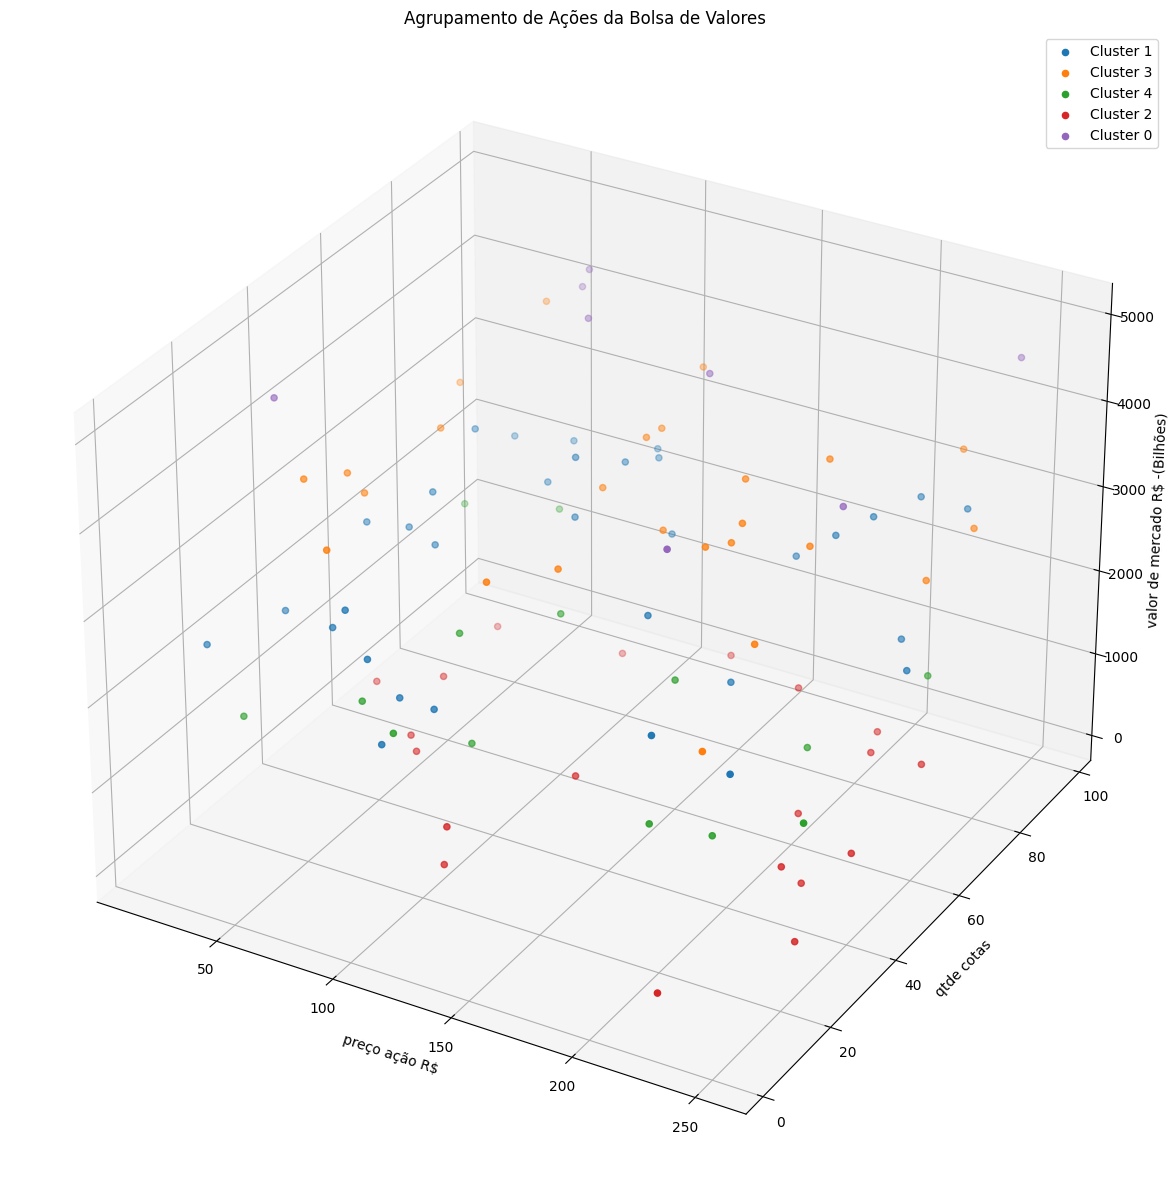

         Preço da Ação  Volume de Negociação  Capitalização de Mercado  \
Cluster                                                                  
0          2292.157282          2.600392e+06              8.548502e+11   
1          1721.803918          2.772412e+06              1.812930e+12   
2          1669.222561          2.546484e+06              3.508185e+11   
3          2110.593040          2.425316e+06              1.312753e+12   

         Símbolo_AMZN  Símbolo_FB  Símbolo_GOOGL  Símbolo_MSFT  Símbolo_TSLA  
Cluster                                                                       
0            0.238095    0.142857       0.190476      0.047619      0.190476  
1            0.227273    0.136364       0.181818      0.090909      0.181818  
2            0.212121    0.181818       0.181818      0.181818      0.151515  
3            0.250000    0.083333       0.208333      0.000000      0.250000  


In [416]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

dados['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for cluster in dados['Cluster'].unique():
    cluster_dados = dados[dados['Cluster'] == cluster]
    ax.scatter(cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], cluster_dados['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('preço ação R$')
ax.set_ylabel('qtde cotas')
ax.set_zlabel('valor de mercado R$ -(Bilhões)')
ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


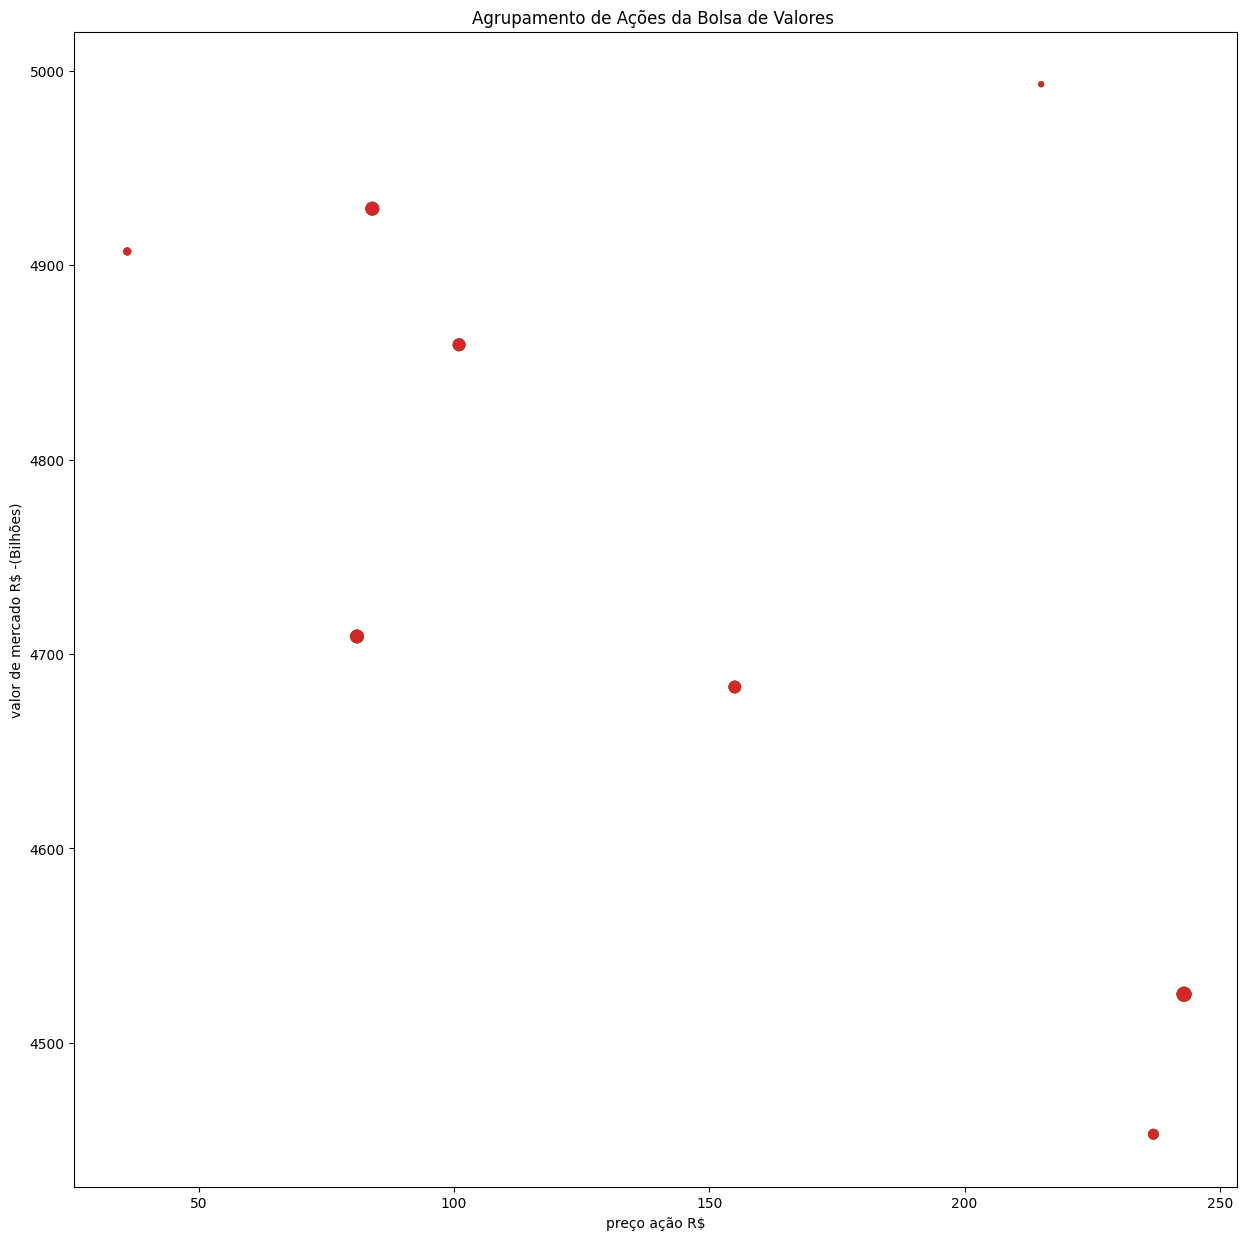

In [417]:
features = dados[['preço ação R$', 'valor de mercado R$ -(Bilhões)', 'qtde cotas']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

dados['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico bidimensional
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_dados['preço ação R$'], cluster_dados['valor de mercado R$ -(Bilhões)'], cluster_dados['qtde cotas'], label=f'Cluster {cluster}')
    
    ax.set_xlabel('preço ação R$')
    ax.set_ylabel('valor de mercado R$ -(Bilhões)')
    ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


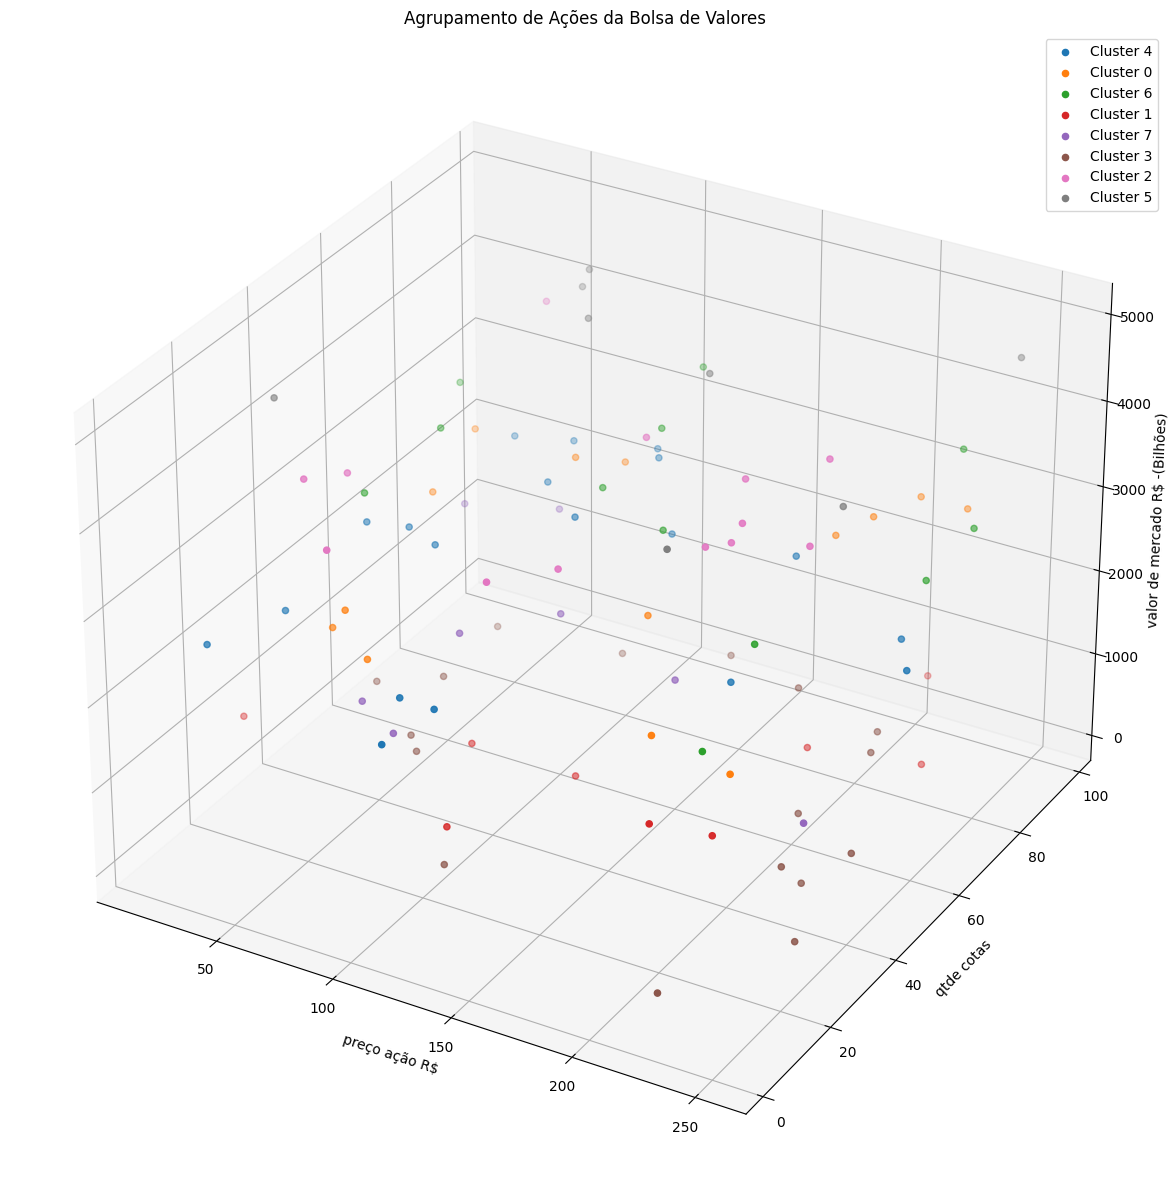

         Preço da Ação  Volume de Negociação  Capitalização de Mercado  \
Cluster                                                                  
0          2292.157282          2.600392e+06              8.548502e+11   
1          1721.803918          2.772412e+06              1.812930e+12   
2          1669.222561          2.546484e+06              3.508185e+11   
3          2110.593040          2.425316e+06              1.312753e+12   

         Símbolo_AMZN  Símbolo_FB  Símbolo_GOOGL  Símbolo_MSFT  Símbolo_TSLA  
Cluster                                                                       
0            0.238095    0.142857       0.190476      0.047619      0.190476  
1            0.227273    0.136364       0.181818      0.090909      0.181818  
2            0.212121    0.181818       0.181818      0.181818      0.151515  
3            0.250000    0.083333       0.208333      0.000000      0.250000  


In [418]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)

dados['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico tridimensional
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for cluster in dados['Cluster'].unique():
    cluster_dados = dados[dados['Cluster'] == cluster]
    ax.scatter(cluster_dados['preço ação R$'], cluster_dados['qtde cotas'], cluster_dados['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('preço ação R$')
ax.set_ylabel('qtde cotas')
ax.set_zlabel('valor de mercado R$ -(Bilhões)')
ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')

plt.legend()
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


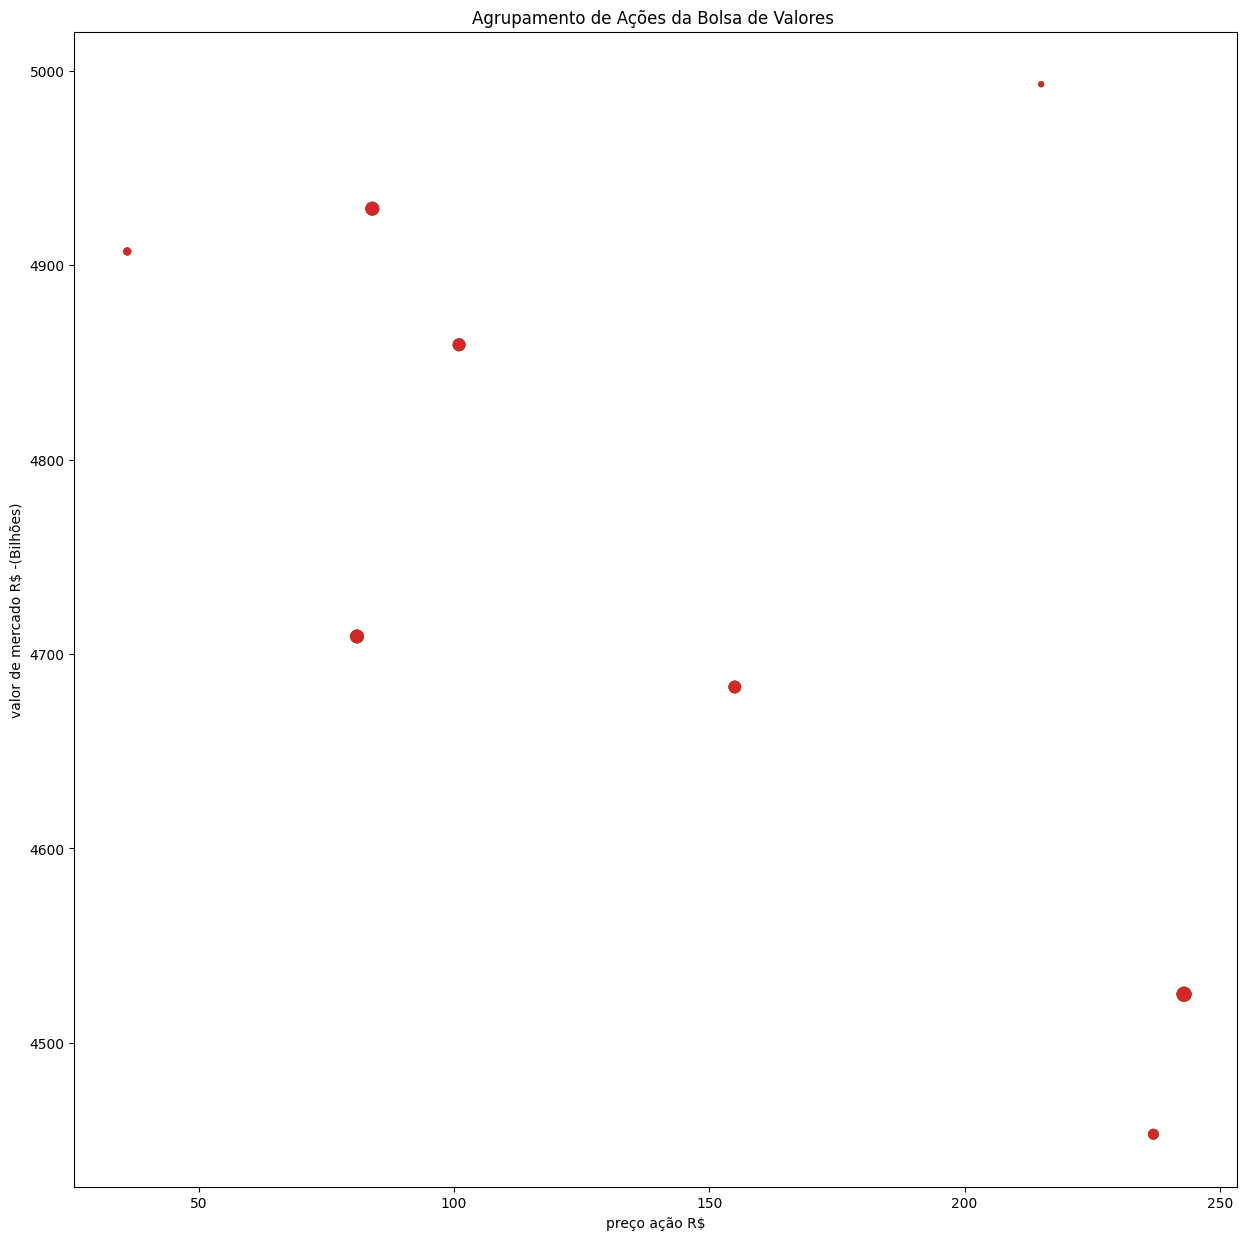

In [419]:
features = dados[['preço ação R$', 'valor de mercado R$ -(Bilhões)', 'qtde cotas']]
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)

dados['Cluster'] = kmeans.labels_

# Visualizar os grupos em um gráfico bidimensional
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_dados['preço ação R$'], cluster_dados['valor de mercado R$ -(Bilhões)'], cluster_dados['qtde cotas'], label=f'Cluster {cluster}')
    
    ax.set_xlabel('preço ação R$')
    ax.set_ylabel('valor de mercado R$ -(Bilhões)')
    ax.set_title(f'Agrupamento de Ações da Bolsa de Valores ')